In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import style
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
from sklearn import datasets

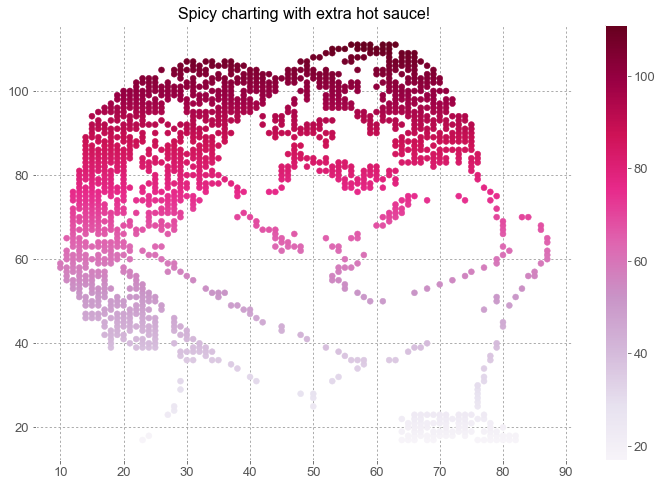

In [2]:
style.use('ggplot_pp.mplstyle')
f, ax = plt.subplots( figsize = (12,8) )

df = pd.read_csv( 'spicy.csv' )
cm = plt.cm.get_cmap('PuRd')

sc = ax.scatter( df.x, df.y, c = df.y, vmin = min( df.y ), vmax = max( df.y ), s = 35, cmap = cm )
ax.set_title( 'Spicy charting with extra hot sauce!', fontsize = 16 )

plt.colorbar( sc )

plt.show()

## Data preparation

To visualize stuff we first need to have some data. In the following examples we'll use a combination of random generated data, and well known datasets such as the Iris machine learning dataset.

In [ ]:
# Based on: http://stackoverflow.com/a/38105540/3104151

# save load_iris() sklearn dataset to iris
iris = datasets.load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
irisDF = pd.DataFrame(
    data    = np.c_[ iris['data'], iris['target'] ],
    columns = iris['feature_names'] + ['target']
)

# Rename columns for clarity and ease of use
newNames = [ 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species' ]
irisDF.rename( 
    columns = { oldName : newName for oldName, newName in zip( irisDF.columns, newNames ) },
    inplace = True 
)

# Replace species indices with species names
Species = [ 'Iris setosa', 'Iris versicolour', 'Iris virginica' ]
irisDF.Species = [ Species[int(i)] for i in irisDF.Species ]

## Styles

### What are styles?
Styles are collections of plot design parameters, such as fonts, gridlines, line width, background color, etc.

Matplotlib provides a list of style presets, and if you have a really good eye for slick design, you can also define your own style and use it. WARNING: most developers tend to be pretty bad at design, so it might be safer to use one of the existing presets :-P

In [ ]:
# Available style presets
print( style.available )

In [ ]:
def testStyle( styleType = None ):
    ''' Draw 6 charts using the Iris dataset and some random data,
    using the provided styleType (or the default style of no valid style is provided)
    '''

    edgeColor = ( 0.2, 0.2, 0.2, 1.0 ) # Bar and histogram edge color
    
    # Set style if received a valid style name
    if styleType and styleType in style.available:
        style.use( styleType )
    else:
        mpl.rcParams.update( mpl.rcParamsDefault )
    
    # Generate a figure with 3X3 plots
    f, ax = plt.subplots( 3, 2, figsize = (16,18) )
    ax = ax.flat # Flatten axis matrix to 1D flat array of axis objects

    # Chart 1: Histogram of Sepal Length
    ax[0].hist( irisDF.SepalLength, edgecolor = edgeColor, linewidth = 1.0 )
    ax[0].set( title = 'Iris Sepal Length Histogram', ylabel = 'Frequency', xlabel = 'Sepal Length' )
    
    # Chart 2: Plotting all 4 features as line charts
    x = np.arange( len( irisDF ) )
    ax[1].plot( x, irisDF.SepalLength, label = "Sepal Length" )
    ax[1].plot( x, irisDF.SepalWidth,  label = "Sepal Width"  )
    ax[1].plot( x, irisDF.PetalLength, label = "Petal Length" )
    ax[1].plot( x, irisDF.PetalWidth,  label = "Petal Width"  )
    ax[1].set( title = "Iris features", ylabel = "CM" )
    ax[1].legend()
    
    # Chart 3: Bar plot of Sepal Length by species
    meanSpealLengthPerSpecies = irisDF.groupby('Species').agg({ 'SepalLength' : 'mean' })
    x  = meanSpealLengthPerSpecies.index
    y  = meanSpealLengthPerSpecies.SepalLength
    xi = list( range( len( x ) ) )
    ax[2].bar( xi, y, edgecolor = edgeColor, linewidth = 1.0 )
    ax[2].set_xticks( xi )
    ax[2].set_xticklabels( x )
    ax[2].set_title( "Mean Sepal Length by Species" )
    
    # Chart 4: Boxplot of Petal Length by species
    x = irisDF.Species.unique()
    y = [ irisDF[ irisDF.Species == xi ].PetalLength for xi in x ]
    ax[3].boxplot( y, labels = x )
    ax[3].set( title = 'Petal Length by Species' )
    
    # Chart 5: Scatter plot of Petal length by petal width
    ax[4].scatter( irisDF.PetalLength, irisDF.PetalWidth )
    ax[4].set( title = "Iris Petal Length vs. Width", xlabel = 'Petal Length', ylabel = 'Petal Width' )
    
    # Chart 6: Random Image
    img = np.random.random( ( 100, 100 ) )
    ax[5].imshow( img )
    ax[5].set_title( "Random Image" )
          
    plt.show()

### My personal favorites: ggplot and fivethirtyeight
Let's compare them with the default matplotlib style. The examples below use some techniques for subplotting that we'll discuss later, you can just ignore it and only use the function to test styles for now.

In [ ]:
print( "Default style" )
testStyle( styleType = None )

In [ ]:
print( 'ggplot' )
testStyle( styleType = 'ggplot' )

In [ ]:
print( 'fivethirtyeight' )
testStyle( styleType = 'fivethirtyeight' )

## Using figures and axis objects

### Figures
A figure is a canvas for drawing your plots. It has a designated size (`figsize`), and can contain several subplots.
After creating a new figure, all the plots you draw will be added to this figure (until you generate a new figure, or run `plot.show()`).


In [ ]:
def values_to_colors( values, cmapName = 'Spectral_r' ):
    """ This function accepts a list of values and a colormap name, and returns a list of colors
    from the color map, matching the normalized values provided.

    Arguments:
    values   -- Flat array of values
    cmapName -- Name of a matplotlib colormap to be used
    """

    # Normalize values list
    a = np.array( values )
    norm = ( a - a.min() ) / ( a.max() - a.min() )

    # Make sure provided colormap name exists, otherwise fallback to Spectral
    if cmapName not in plt.colormaps():
        cmapName = 'Spectral_r'
        
    cmap = plt.get_cmap( cmapName )
    
    # Calculate colors via colormap and return them
    return [ cmap( v ) for v in norm ]

In [ ]:
fig, ax = plt.subplots( figsize = ( 12, 7) )
ax.bar( xi, y )
ax.set_xticks( xi )
ax.set_xticklabels( x, fontsize = 14 )
ax.set_title( "Mean Sepal Length by Species", fontsize = 18 )
ax.set_yticklabels( np.linspace(0,7,8), fontsize = 14 )
plt.show()

In [ ]:
fig, ax = plt.subplots( figsize = ( 12, 7) )
ax.bar( xi, y, color = plt.get_cmap('Vega10').colors )
ax.set_xticks( xi )
ax.set_xticklabels( x, fontsize = 14 )
ax.set_title( "Mean Sepal Length by Species", fontsize = 18 )
ax.set_yticklabels( np.linspace(0,7,8), fontsize = 14 )
plt.show()

In [ ]:
f, ax = plt.subplots( figsize = (12, 12 ) )
x = np.linspace(0,128,128)
y = np.random.random(128) * 5
ax.plot( x, y )
ax.scatter( x, y, color = values_to_colors( x, 'cool' ) )
plt.show()


In [ ]:
# Timeseries data
from datetime import datetime, timedelta
firstDay = datetime( 2017, 5, 17 )
x = pd.Series([ firstDay + timedelta(i) for i in range(50) ])
y = np.random.randint(0, 100, 50)

# Timeseries data makes for pretty long and cumbersome x axis labels.
# Will not work with default settings.
xi = list( range( len( x ) ) )
plt.bar( xi, y, color = [ plt.cm.cool(i*5) for i in range(50) ] )
plt.xticks( xi, x )
plt.show()

In [ ]:
plt.bar( xi, y )
plt.xticks( xi, x, rotation = 90 )
plt.show()

In [ ]:
f = plt.figure()
a = f.subplots(1, 2, figsize = (12, 7))

ax[0].scatter( irisDF.PetalLength, irisDF.PetalWidth, color = values_to_colors( irisDF.PetalLength ) )
ax[0].set( title = "Iris Petal Length vs. Width", xlabel = 'Petal Length', ylabel = 'Petal Width' )

ax[1].hist( irisDF.PetalWidth, color = values_to_colors( irisDF.PetalLength ) )

p = f.subplots( figsize = (12,5) )
p.plot( irisDF.PetalLength, irisDF.PetalWidth )

plt.show()

In [ ]:
# Nutrition, Physical Activity, and Obesity - Behavioral Risk Factor Surveillance System;
# Metadata Updated: April 17, 2017 
medDF = pd.read_csv( 'https://chronicdata.cdc.gov/api/views/hn4x-zwk7/rows.csv?accessType=DOWNLOAD' )

In [ ]:
mtcars = pd.read_csv("mtcars.csv")

In [ ]:
mtcars.columns

In [ ]:
mtcars.describe()

In [ ]:
valueCounts = mtcars.cyl.value_counts().sort_index()

In [ ]:
boston = datasets.load_boston()
bostonDF = pd.DataFrame(
    data    = np.c_[ boston['data'], boston['target'] ],
    columns = list( boston['feature_names'] ) + ['MEDV']
)